In [1]:
import shapefile
import os
import earthpy as et
import pandas as pd
import fiona
import pyproj
from pyproj import CRS
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import glob

#load in csv of city lons and lats
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=0)

In [309]:
#CITY_COUNTRY_lat_lon

ADMINISTRATIVE AREA

In [303]:
#Calculating Administrative areas

City = 'Bulawayo'
Country = 'Zimbabwe'
CITY_COUNTRY = 'BULAWAYO_ZIMBABWE'

os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT', 'shapefiles', 'Administrative_borders', Country ))

for file in glob.glob("*_2.shp"):
    filename = file
    
sf = gpd.read_file(filename)

In [305]:
sf[(sf["NAME_2"] == City)]

#for where more than 1 city with same name
#sf[(sf["NAME_3"] == City) & (sf["NAME_2"] == City)]

#for where there are mulitple city zones
#searchfor = [City, 'Zona']
#sf[(sf["NAME_2"] == City) & (sf['NAME_3'].str.contains('|'.join(searchfor), na = False))]

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,ZWE,Zimbabwe,ZWE.1_1,Bulawayo,None,ZWE.1.1_1,Bulawayo,None,None,District,District,None,ZW.BU.BL,"POLYGON ((28.61305 -20.23587, 28.60440 -20.225..."


In [216]:
#print districts
sf[(sf["NAME_2"] == City)]['NAME_3'].values

#sf[(sf["NAME_2"] == City) & (sf['NAME_3'].str.contains('|'.join(searchfor), na = False))]['NAME_3'].values

array(['Amarpatan', 'Maihar', 'Nagod', 'Satna'], dtype=object)

In [306]:
#define lat and lon
City_Lat = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['Lat'].values[0]
City_Lon = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['Lon'].values[0]

#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

#set the crs
sf.to_crs(epsg=4326, inplace=True)

#change crs to local
sf2 = sf.to_crs(epsg=local_epsg).copy()

#calculate area
sf2["area"] = sf2['geometry'].area/ (10**6)

In [307]:
#calculate area of city
sf2[sf2["NAME_2"] == City]['area'].sum()

#for where there is more than 1 district with same name
#sf2[(sf2["NAME_3"] == City) & (sf2["NAME_2"] == City)]['area'].sum()
#sf2[(sf2["NAME_2"] == City) & (sf2['NAME_3'].str.contains('|'.join(searchfor), na = False))]['area'].sum()

458.2456473359932

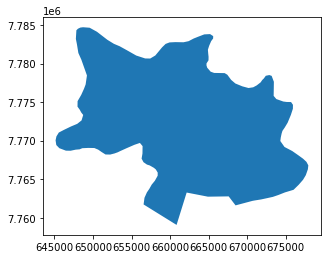

In [308]:
#plot area
sf2[sf2["NAME_2"] == City].plot()

#for where there is more than 1 district with same name
#sf2[(sf2["NAME_3"] == City) & (sf2["NAME_2"] == City)].plot()

#save the plot as a png
plt.savefig('admin_border_{}.png'.format(City))

AREA BASED ON URBAN COVERAGE


In [27]:
###Areas based on urban coverage
#import require packages
import pickle
import warnings
import scipy
from scipy import interpolate
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import earthpy as et
import numpy as np
import pandas as pd

#use the LULC base files
#use city area as of 2015

#Load in LULC data
#go to directory to work in 
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))

#load in csv of city lons and lats
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=0)
#ignore warnings- JASMIN proj is out of date so had to use deprecated syntax        

In [21]:
#load in all the files
CITY_COUNTRY = 'HUAMBO_ANGOLA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Huambo_LULC_df = pickle.load(f)
        
CITY_COUNTRY = 'ANAPOLIS_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Anapolis_LULC_df = pickle.load(f)
        
CITY_COUNTRY = 'CUIABA_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Cuiaba_LULC_df = pickle.load(f)
        
CITY_COUNTRY = 'FRANCA_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Franca_LULC_df = pickle.load(f)
        
CITY_COUNTRY = 'LINQING_CHINA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Linqing_LULC_df = pickle.load(f)    
        
CITY_COUNTRY = 'MARINGA_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Maringa_LULC_df = pickle.load(f)    
        
CITY_COUNTRY = 'PIRACICABA_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Piracicaba_LULC_df = pickle.load(f)    

CITY_COUNTRY = 'RIBEIRAO_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Ribeirao_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'SAO_JOSE_DO_RIO_PRETO_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Sao_Jose_Do_Rio_Preto_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'ASYUT_EGYPT'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Asyut_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'AKOLA_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Akola_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'ERODE_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Erode_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'HISAR_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Hisar_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'PARBHANI_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Parbhani_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'SATNA_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Satna_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'PARBHANI_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Parbhani_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'SHAHJAHANPUR_INDIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Shahjahanpur_LULC_df = pickle.load(f)        
        
CITY_COUNTRY = 'BLOEMFONTEIN_SOUTH_AFRICA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Bloemfontein_LULC_df = pickle.load(f)  
              
CITY_COUNTRY = 'AL_GADARIF_SUDAN'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Al_Gadarif_LULC_df = pickle.load(f)  
        
CITY_COUNTRY = 'KASSALA_SUDAN'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Kassala_LULC_df = pickle.load(f)  

CITY_COUNTRY = 'SPOKANE_UNITED_STATES'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Spokane_LULC_df = pickle.load(f)  

CITY_COUNTRY = 'NDOLA_ZAMBIA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Ndola_LULC_df = pickle.load(f)  

CITY_COUNTRY = 'BULAWAYO_ZIMBABWE'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Bulawayo_LULC_df = pickle.load(f)            

C:\Anaconda3\envs\project_environment\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [3]:
#Look at urban land cover
#get the points into the correct format
#Huambo
x_lu = Huambo_LULC_df['x_points'].values
y_lu = Huambo_LULC_df['y_points'].values
U_lu = Huambo_LULC_df['is_urban_overall_2015'].values

Huambo_X_lu,Huambo_Y_lu = np.meshgrid(x_lu,y_lu)
Huambo_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Huambo_X_lu, Huambo_Y_lu), method='nearest')

#Anapolis
x_lu = Anapolis_LULC_df['x_points'].values
y_lu = Anapolis_LULC_df['y_points'].values
U_lu = Anapolis_LULC_df['is_urban_overall_2015'].values

Anapolis_X_lu, Anapolis_Y_lu = np.meshgrid(x_lu,y_lu)
Anapolis_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Anapolis_X_lu, Anapolis_Y_lu), method='nearest')

#Cuiaba
x_lu = Cuiaba_LULC_df['x_points'].values
y_lu = Cuiaba_LULC_df['y_points'].values
U_lu = Cuiaba_LULC_df['is_urban_overall_2015'].values

Cuiaba_X_lu, Cuiaba_Y_lu = np.meshgrid(x_lu,y_lu)
Cuiaba_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Cuiaba_X_lu, Cuiaba_Y_lu), method='nearest')

#Franca
x_lu = Franca_LULC_df['x_points'].values
y_lu = Franca_LULC_df['y_points'].values
U_lu = Franca_LULC_df['is_urban_overall_2015'].values

Franca_X_lu, Franca_Y_lu = np.meshgrid(x_lu,y_lu)
Franca_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Franca_X_lu, Franca_Y_lu), method='nearest')

#Maringa
x_lu = Maringa_LULC_df['x_points'].values
y_lu = Maringa_LULC_df['y_points'].values
U_lu = Maringa_LULC_df['is_urban_overall_2015'].values

Maringa_X_lu, Maringa_Y_lu = np.meshgrid(x_lu,y_lu)
Maringa_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Maringa_X_lu, Maringa_Y_lu), method='nearest')

#Piracicaba
x_lu = Piracicaba_LULC_df['x_points'].values
y_lu = Piracicaba_LULC_df['y_points'].values
U_lu = Piracicaba_LULC_df['is_urban_overall_2015'].values

Piracicaba_X_lu, Piracicaba_Y_lu = np.meshgrid(x_lu,y_lu)
Piracicaba_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Piracicaba_X_lu, Piracicaba_Y_lu), method='nearest')

#Ribierao
x_lu = Ribeirao_LULC_df['x_points'].values
y_lu = Ribeirao_LULC_df['y_points'].values
U_lu = Ribeirao_LULC_df['is_urban_overall_2015'].values

Ribeirao_X_lu, Ribeirao_Y_lu = np.meshgrid(x_lu,y_lu)
Ribeirao_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Ribeirao_X_lu, Ribeirao_Y_lu), method='nearest')

#Sao_Jose_Do_Rio_Preto
x_lu = Sao_Jose_Do_Rio_Preto_LULC_df['x_points'].values
y_lu = Sao_Jose_Do_Rio_Preto_LULC_df['y_points'].values
U_lu = Sao_Jose_Do_Rio_Preto_LULC_df['is_urban_overall_2015'].values

Sao_Jose_Do_Rio_Preto_X_lu, Sao_Jose_Do_Rio_Preto_Y_lu = np.meshgrid(x_lu,y_lu)
Sao_Jose_Do_Rio_Preto_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Sao_Jose_Do_Rio_Preto_X_lu, Sao_Jose_Do_Rio_Preto_Y_lu), method='nearest')

#Linqing
x_lu = Linqing_LULC_df['x_points'].values
y_lu = Linqing_LULC_df['y_points'].values
U_lu = Linqing_LULC_df['is_urban_overall_2015'].values

Linqing_X_lu, Linqing_Y_lu = np.meshgrid(x_lu,y_lu)
Linqing_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')

#Asyut
x_lu = Asyut_LULC_df['x_points'].values
y_lu = Asyut_LULC_df['y_points'].values
U_lu = Asyut_LULC_df['is_urban_overall_2015'].values

Asyut_X_lu, Asyut_Y_lu = np.meshgrid(x_lu,y_lu)
Asyut_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Asyut_X_lu, Asyut_Y_lu), method='nearest')


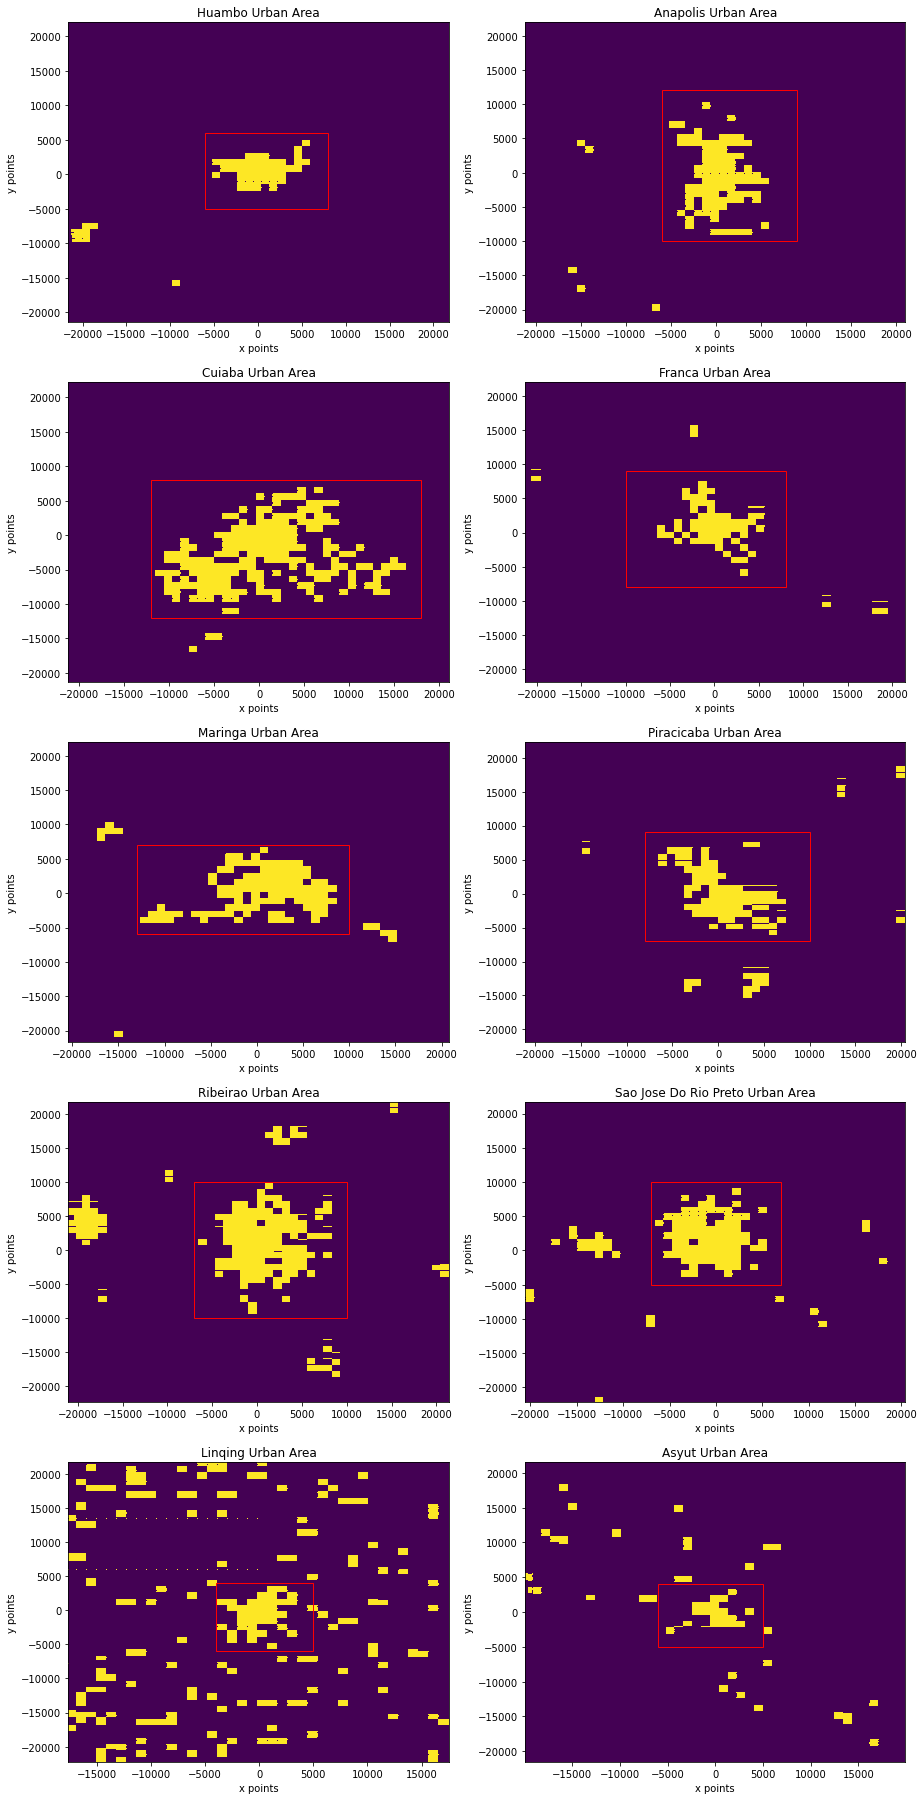

In [4]:
#Make plot 1
#have to split into 2 plots as takes up too much memory
#Colour mesh plot
fig, axes = plt.subplots(nrows=5, ncols = 2, figsize = (15,32))

Huambo_bbox = mpatches.Rectangle((-6000, -5000), 14000, 11000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Anapolis_bbox = mpatches.Rectangle((-6000, -10000), 15000, 22000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Cuiaba_bbox = mpatches.Rectangle((-12000, -12000), 30000, 20000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Franca_bbox = mpatches.Rectangle((-10000, -8000), 18000, 17000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Maringa_bbox = mpatches.Rectangle((-13000, -6000), 23000, 13000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Piracicaba_bbox = mpatches.Rectangle((-8000, -7000), 18000, 16000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Ribeirao_bbox = mpatches.Rectangle((-7000, -10000), 17000, 20000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Sao_Jose_Do_Rio_Preto_bbox = mpatches.Rectangle((-7000, -5000), 14000, 15000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Linqing_bbox = mpatches.Rectangle((-4000, -6000), 9000, 10000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Asyut_bbox = mpatches.Rectangle((-6000, -5000), 11000, 9000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')


axes[0,0].pcolormesh(Huambo_X_lu, Huambo_Y_lu, Huambo_Z_lu, shading = 'auto')
axes[0,0].set_title('Huambo Urban Area')
axes[0,0].set_xlabel('x points')
axes[0,0].set_ylabel('y points')
axes[0,0].add_patch(Huambo_bbox)


axes[0,1].pcolormesh(Anapolis_X_lu, Anapolis_Y_lu, Anapolis_Z_lu, shading = 'auto')
axes[0,1].set_title('Anapolis Urban Area')
axes[0,1].set_xlabel('x points')
axes[0,1].set_ylabel('y points')
axes[0,1].add_patch(Anapolis_bbox)

axes[1,0].pcolormesh(Cuiaba_X_lu, Cuiaba_Y_lu, Cuiaba_Z_lu, shading = 'auto')
axes[1,0].set_title('Cuiaba Urban Area')
axes[1,0].set_xlabel('x points')
axes[1,0].set_ylabel('y points')
axes[1,0].add_patch(Cuiaba_bbox)

axes[1,1].pcolormesh(Franca_X_lu, Franca_Y_lu, Franca_Z_lu, shading = 'auto')
axes[1,1].set_title('Franca Urban Area')
axes[1,1].set_xlabel('x points')
axes[1,1].set_ylabel('y points')
axes[1,1].add_patch(Franca_bbox)

axes[2,0].pcolormesh(Maringa_X_lu, Maringa_Y_lu, Maringa_Z_lu, shading = 'auto')
axes[2,0].set_title('Maringa Urban Area')
axes[2,0].set_xlabel('x points')
axes[2,0].set_ylabel('y points')
axes[2,0].add_patch(Maringa_bbox)

axes[2,1].pcolormesh(Piracicaba_X_lu, Piracicaba_Y_lu, Piracicaba_Z_lu, shading = 'auto')
axes[2,1].set_title('Piracicaba Urban Area')
axes[2,1].set_xlabel('x points')
axes[2,1].set_ylabel('y points')
axes[2,1].add_patch(Piracicaba_bbox)

axes[3,0].pcolormesh(Ribeirao_X_lu, Ribeirao_Y_lu, Ribeirao_Z_lu, shading = 'auto')
axes[3,0].set_title('Ribeirao Urban Area')
axes[3,0].set_xlabel('x points')
axes[3,0].set_ylabel('y points')
axes[3,0].add_patch(Ribeirao_bbox)

axes[3,1].pcolormesh(Sao_Jose_Do_Rio_Preto_X_lu, Sao_Jose_Do_Rio_Preto_Y_lu, Sao_Jose_Do_Rio_Preto_Z_lu, shading = 'auto')
axes[3,1].set_title('Sao Jose Do Rio Preto Urban Area')
axes[3,1].set_xlabel('x points')
axes[3,1].set_ylabel('y points')
axes[3,1].add_patch(Sao_Jose_Do_Rio_Preto_bbox)

axes[4,0].pcolormesh(Linqing_X_lu, Linqing_Y_lu, Linqing_Z_lu, shading = 'auto')
axes[4,0].set_title('Linqing Urban Area')
axes[4,0].set_xlabel('x points')
axes[4,0].set_ylabel('y points')
axes[4,0].add_patch(Linqing_bbox)

axes[4,1].pcolormesh(Asyut_X_lu, Asyut_Y_lu, Asyut_Z_lu, shading = 'auto')
axes[4,1].set_title('Asyut Urban Area')
axes[4,1].set_xlabel('x points')
axes[4,1].set_ylabel('y points')
axes[4,1].add_patch(Asyut_bbox)

plt.savefig('City_area_pt1.png')

In [15]:
#Look at urban land cover
#get the points into the correct format
#Akola
x_lu = Akola_LULC_df['x_points'].values
y_lu = Akola_LULC_df['y_points'].values
U_lu = Akola_LULC_df['is_urban_overall_2015'].values

Akola_X_lu,Akola_Y_lu = np.meshgrid(x_lu,y_lu)
Akola_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Akola_X_lu, Akola_Y_lu), method='nearest')

#Erode
x_lu = Erode_LULC_df['x_points'].values
y_lu = Erode_LULC_df['y_points'].values
U_lu = Erode_LULC_df['is_urban_overall_2015'].values

Erode_X_lu, Erode_Y_lu = np.meshgrid(x_lu,y_lu)
Erode_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Erode_X_lu, Erode_Y_lu), method='nearest')

#Hisar
x_lu = Hisar_LULC_df['x_points'].values
y_lu = Hisar_LULC_df['y_points'].values
U_lu = Hisar_LULC_df['is_urban_overall_2015'].values

Hisar_X_lu, Hisar_Y_lu = np.meshgrid(x_lu,y_lu)
Hisar_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Hisar_X_lu, Hisar_Y_lu), method='nearest')

#Parbhani
x_lu = Parbhani_LULC_df['x_points'].values
y_lu = Parbhani_LULC_df['y_points'].values
U_lu = Parbhani_LULC_df['is_urban_overall_2015'].values

Parbhani_X_lu, Parbhani_Y_lu = np.meshgrid(x_lu,y_lu)
Parbhani_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Parbhani_X_lu, Parbhani_Y_lu), method='nearest')

#Satna
x_lu = Satna_LULC_df['x_points'].values
y_lu = Satna_LULC_df['y_points'].values
U_lu = Satna_LULC_df['is_urban_overall_2015'].values

Satna_X_lu, Satna_Y_lu = np.meshgrid(x_lu,y_lu)
Satna_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Satna_X_lu, Satna_Y_lu), method='nearest')

#Shahjahanpur
x_lu = Shahjahanpur_LULC_df['x_points'].values
y_lu = Shahjahanpur_LULC_df['y_points'].values
U_lu = Shahjahanpur_LULC_df['is_urban_overall_2015'].values

Shahjahanpur_X_lu, Shahjahanpur_Y_lu = np.meshgrid(x_lu,y_lu)
Shahjahanpur_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Shahjahanpur_X_lu, Shahjahanpur_Y_lu), method='nearest')

#Bloemfontein
x_lu = Bloemfontein_LULC_df['x_points'].values
y_lu = Bloemfontein_LULC_df['y_points'].values
U_lu = Bloemfontein_LULC_df['is_urban_overall_2015'].values

Bloemfontein_X_lu, Bloemfontein_Y_lu = np.meshgrid(x_lu,y_lu)
Bloemfontein_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Bloemfontein_X_lu, Bloemfontein_Y_lu), method='nearest')

#Al_Gadarif
x_lu = Al_Gadarif_LULC_df['x_points'].values
y_lu = Al_Gadarif_LULC_df['y_points'].values
U_lu = Al_Gadarif_LULC_df['is_urban_overall_2015'].values

Al_Gadarif_X_lu, Al_Gadarif_Y_lu = np.meshgrid(x_lu,y_lu)
Al_Gadarif_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Al_Gadarif_X_lu, Al_Gadarif_Y_lu), method='nearest')

#Kassala
x_lu = Kassala_LULC_df['x_points'].values
y_lu = Kassala_LULC_df['y_points'].values
U_lu = Kassala_LULC_df['is_urban_overall_2015'].values

Kassala_X_lu, Kassala_Y_lu = np.meshgrid(x_lu,y_lu)
Kassala_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Kassala_X_lu, Kassala_Y_lu), method='nearest')

#Spokane
x_lu = Spokane_LULC_df['x_points'].values
y_lu = Spokane_LULC_df['y_points'].values
U_lu = Spokane_LULC_df['is_urban_overall_2015'].values

Spokane_X_lu, Spokane_Y_lu = np.meshgrid(x_lu,y_lu)
Spokane_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Spokane_X_lu, Spokane_Y_lu), method='nearest')

#Ndola
x_lu = Ndola_LULC_df['x_points'].values
y_lu = Ndola_LULC_df['y_points'].values
U_lu = Ndola_LULC_df['is_urban_overall_2015'].values

Ndola_X_lu, Ndola_Y_lu = np.meshgrid(x_lu,y_lu)
Ndola_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Ndola_X_lu, Ndola_Y_lu), method='nearest')

#Bulawayo
x_lu = Bulawayo_LULC_df['x_points'].values
y_lu = Bulawayo_LULC_df['y_points'].values
U_lu = Bulawayo_LULC_df['is_urban_overall_2015'].values

Bulawayo_X_lu, Bulawayo_Y_lu = np.meshgrid(x_lu,y_lu)
Bulawayo_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Bulawayo_X_lu, Bulawayo_Y_lu), method='nearest')

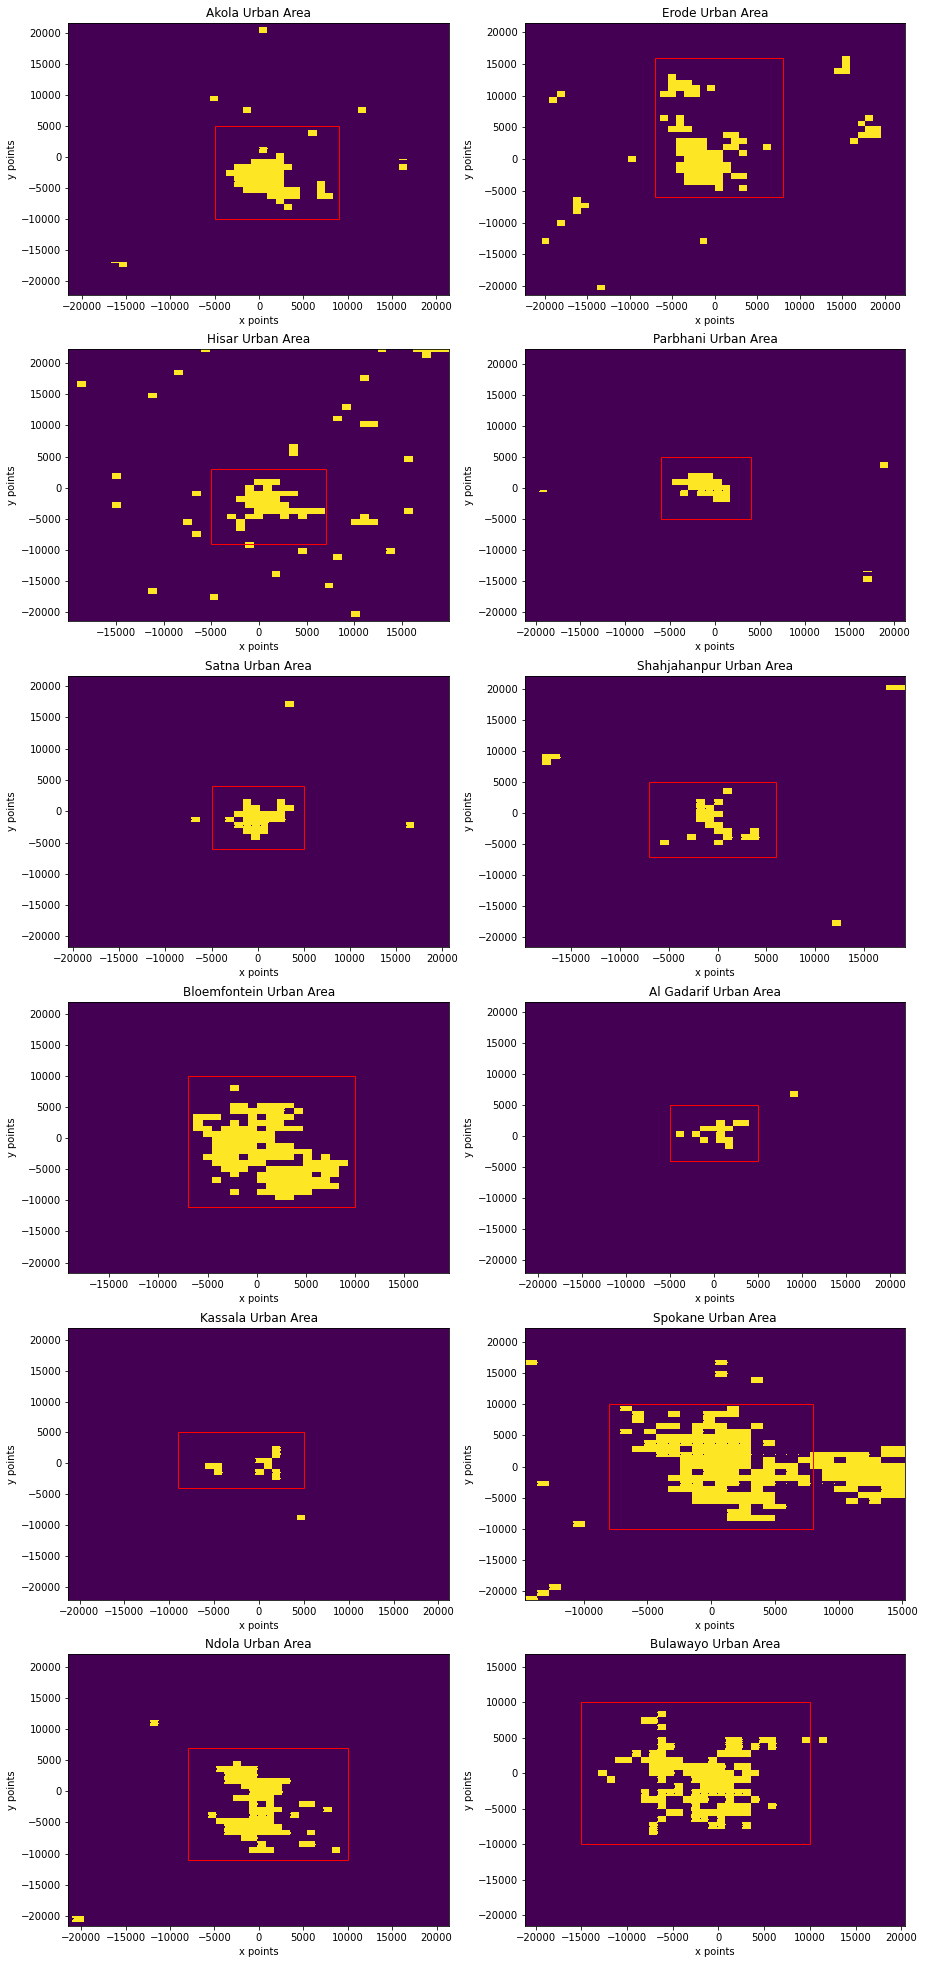

In [18]:
#Make plot 2
#have to split into 2 plots as takes up too much memory
#Colour mesh plot
fig, axes = plt.subplots(nrows=6, ncols = 2, figsize = (15,35))

Akola_bbox = mpatches.Rectangle((-5000, -10000), 14000, 15000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Erode_bbox = mpatches.Rectangle((-7000, -6000), 15000, 22000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Hisar_bbox = mpatches.Rectangle((-5000, -9000), 12000, 12000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Parbhani_bbox = mpatches.Rectangle((-6000, -5000), 10000, 10000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Satna_bbox = mpatches.Rectangle((-5000, -6000), 10000, 10000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Shahjahanpur_bbox = mpatches.Rectangle((-7000, -7000), 13000, 12000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Bloemfontein_bbox = mpatches.Rectangle((-7000, -11000), 17000, 21000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Al_Gadarif_bbox = mpatches.Rectangle((-5000, -4000), 10000, 9000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Kassala_bbox = mpatches.Rectangle((-9000, -4000), 14000, 9000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Spokane_bbox = mpatches.Rectangle((-8000, -10000), 16000, 20000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Ndola_bbox = mpatches.Rectangle((-8000, -11000), 18000, 18000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')

Bulawayo_bbox = mpatches.Rectangle((-15000, -10000), 25000, 20000, angle = 0, linewidth=1,edgecolor='r',facecolor='none')


axes[0,0].pcolormesh(Akola_X_lu, Akola_Y_lu, Akola_Z_lu, shading = 'auto')
axes[0,0].set_title('Akola Urban Area')
axes[0,0].set_xlabel('x points')
axes[0,0].set_ylabel('y points')
axes[0,0].add_patch(Akola_bbox)

axes[0,1].pcolormesh(Erode_X_lu, Erode_Y_lu, Erode_Z_lu, shading = 'auto')
axes[0,1].set_title('Erode Urban Area')
axes[0,1].set_xlabel('x points')
axes[0,1].set_ylabel('y points')
axes[0,1].add_patch(Erode_bbox)

axes[1,0].pcolormesh(Hisar_X_lu, Hisar_Y_lu, Hisar_Z_lu, shading = 'auto')
axes[1,0].set_title('Hisar Urban Area')
axes[1,0].set_xlabel('x points')
axes[1,0].set_ylabel('y points')
axes[1,0].add_patch(Hisar_bbox)

axes[1,1].pcolormesh(Parbhani_X_lu, Parbhani_Y_lu, Parbhani_Z_lu, shading = 'auto')
axes[1,1].set_title('Parbhani Urban Area')
axes[1,1].set_xlabel('x points')
axes[1,1].set_ylabel('y points')
axes[1,1].add_patch(Parbhani_bbox)

axes[2,0].pcolormesh(Satna_X_lu, Satna_Y_lu, Satna_Z_lu, shading = 'auto')
axes[2,0].set_title('Satna Urban Area')
axes[2,0].set_xlabel('x points')
axes[2,0].set_ylabel('y points')
axes[2,0].add_patch(Satna_bbox)

axes[2,1].pcolormesh(Shahjahanpur_X_lu, Shahjahanpur_Y_lu, Shahjahanpur_Z_lu, shading = 'auto')
axes[2,1].set_title('Shahjahanpur Urban Area')
axes[2,1].set_xlabel('x points')
axes[2,1].set_ylabel('y points')
axes[2,1].add_patch(Shahjahanpur_bbox)

axes[3,0].pcolormesh(Bloemfontein_X_lu, Bloemfontein_Y_lu, Bloemfontein_Z_lu, shading = 'auto')
axes[3,0].set_title('Bloemfontein Urban Area')
axes[3,0].set_xlabel('x points')
axes[3,0].set_ylabel('y points')
axes[3,0].add_patch(Bloemfontein_bbox)

axes[3,1].pcolormesh(Al_Gadarif_X_lu, Al_Gadarif_Y_lu, Al_Gadarif_Z_lu, shading = 'auto')
axes[3,1].set_title('Al Gadarif Urban Area')
axes[3,1].set_xlabel('x points')
axes[3,1].set_ylabel('y points')
axes[3,1].add_patch(Al_Gadarif_bbox)

axes[4,0].pcolormesh(Kassala_X_lu, Kassala_Y_lu, Kassala_Z_lu, shading = 'auto')
axes[4,0].set_title('Kassala Urban Area')
axes[4,0].set_xlabel('x points')
axes[4,0].set_ylabel('y points')
axes[4,0].add_patch(Kassala_bbox)

axes[4,1].pcolormesh(Spokane_X_lu, Spokane_Y_lu, Spokane_Z_lu, shading = 'auto')
axes[4,1].set_title('Spokane Urban Area')
axes[4,1].set_xlabel('x points')
axes[4,1].set_ylabel('y points')
axes[4,1].add_patch(Spokane_bbox)

axes[5,0].pcolormesh(Ndola_X_lu, Ndola_Y_lu, Ndola_Z_lu, shading = 'auto')
axes[5,0].set_title('Ndola Urban Area')
axes[5,0].set_xlabel('x points')
axes[5,0].set_ylabel('y points')
axes[5,0].add_patch(Ndola_bbox)

axes[5,1].pcolormesh(Bulawayo_X_lu, Bulawayo_Y_lu, Bulawayo_Z_lu, shading = 'auto')
axes[5,1].set_title('Bulawayo Urban Area')
axes[5,1].set_xlabel('x points')
axes[5,1].set_ylabel('y points')
axes[5,1].add_patch(Bulawayo_bbox)

plt.savefig('City_area_pt2.png')

In [22]:
#Calculating the urban area

#calculating the area within the bounding box (each pixel is 1km^2)
#box_cord = [xmin, xmax, ymin, ymax]

Huambo_box_coord = [-5000, 7000, -5000, 5000]
Huambo_area = Huambo_LULC_df[((Huambo_LULC_df['x_points'] > -5000) & (Huambo_LULC_df['x_points'] < 7000) 
                             & (Huambo_LULC_df['y_points'] > -5000) & (Huambo_LULC_df['y_points'] < 5000))
                            ]['is_urban_overall_2015'].sum()

Anapolis_box_coord = [-6000, 9000, -10000, 16000]
Anapolis_area = Anapolis_LULC_df[((Anapolis_LULC_df['x_points'] > -6000) & (Anapolis_LULC_df['x_points'] < 9000) 
                             & (Anapolis_LULC_df['y_points'] > -10000) & (Anapolis_LULC_df['y_points'] < 16000))
                            ]['is_urban_overall_2015'].sum()

Cuiaba_box_coord = [-12000, 18000, -12000, 8000]
Cuiaba_area = Cuiaba_LULC_df[((Cuiaba_LULC_df['x_points'] > -12000) & (Cuiaba_LULC_df['x_points'] < 18000) 
                             & (Cuiaba_LULC_df['y_points'] > -12000) & (Cuiaba_LULC_df['y_points'] < 8000))
                            ]['is_urban_overall_2015'].sum()

Franca_box_coord = [-5000, 7000, -5000, 5000]
xmin = Franca_box_coord[0] ; xmax = Franca_box_coord[1] ; ymin = Franca_box_coord[2] ; ymax = Franca_box_coord[3]
Franca_area = Franca_LULC_df[((Franca_LULC_df['x_points'] > xmin) & (Franca_LULC_df['x_points'] < xmax) 
                             & (Franca_LULC_df['y_points'] > ymin) & (Franca_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Maringa_box_coord = [-13000, 10000, -6000, 7000]
Maringa_area = Maringa_LULC_df[((Maringa_LULC_df['x_points'] > -13000) & (Maringa_LULC_df['x_points'] < 10000) 
                             & (Maringa_LULC_df['y_points'] > -6000) & (Maringa_LULC_df['y_points'] < 7000))
                            ]['is_urban_overall_2015'].sum()

Piracicaba_box_coord = [-13000, 10000, -6000, 7000]
xmin = Piracicaba_box_coord[0] ; xmax = Piracicaba_box_coord[1] ; ymin = Piracicaba_box_coord[2] ; ymax = Piracicaba_box_coord[3]
Piracicaba_area = Piracicaba_LULC_df[((Piracicaba_LULC_df['x_points'] > xmin) & (Piracicaba_LULC_df['x_points'] < xmax) 
                             & (Piracicaba_LULC_df['y_points'] > ymin) & (Piracicaba_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Ribeirao_box_coord = [-7000, 10000, -10000, 10000]
Ribeirao_area = Ribeirao_LULC_df[((Ribeirao_LULC_df['x_points'] > -7000) & (Ribeirao_LULC_df['x_points'] < 10000) 
                             & (Ribeirao_LULC_df['y_points'] > -10000) & (Ribeirao_LULC_df['y_points'] < 10000))
                            ]['is_urban_overall_2015'].sum()

Sao_Jose_Do_Rio_Preto_box_coord = [-13000, 10000, -6000, 7000]
xmin = Sao_Jose_Do_Rio_Preto_box_coord[0] ; xmax = Sao_Jose_Do_Rio_Preto_box_coord[1] 
ymin = Sao_Jose_Do_Rio_Preto_box_coord[2] ; ymax = Sao_Jose_Do_Rio_Preto_box_coord[3]
Sao_Jose_Do_Rio_Preto_area = Sao_Jose_Do_Rio_Preto_LULC_df[((Sao_Jose_Do_Rio_Preto_LULC_df['x_points'] > xmin) & (Sao_Jose_Do_Rio_Preto_LULC_df['x_points'] < xmax) 
                             & (Sao_Jose_Do_Rio_Preto_LULC_df['y_points'] > ymin) & (Sao_Jose_Do_Rio_Preto_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Linqing_box_coord = [-4000, 5000, -6000, 4000]
Linqing_area = Linqing_LULC_df[((Linqing_LULC_df['x_points'] > -4000) & (Linqing_LULC_df['x_points'] < 5000) 
                             & (Linqing_LULC_df['y_points'] > -6000) & (Linqing_LULC_df['y_points'] < 4000))
                            ]['is_urban_overall_2015'].sum()

Asyut_box_coord = [-13000, 10000, -6000, 7000]
xmin = Asyut_box_coord[0] ; xmax = Asyut_box_coord[1] ; ymin = Asyut_box_coord[2] ; ymax = Asyut_box_coord[3]
Asyut_area = Asyut_LULC_df[((Asyut_LULC_df['x_points'] > xmin) & (Asyut_LULC_df['x_points'] < xmax) 
                             & (Asyut_LULC_df['y_points'] > ymin) & (Asyut_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()


Akola_box_coord = [-5000, 9000, -10000, 5000]
xmin = Akola_box_coord[0] ; xmax = Akola_box_coord[1] ; ymin = Akola_box_coord[2] ; ymax = Akola_box_coord[3]
Akola_area = Akola_LULC_df[((Akola_LULC_df['x_points'] > xmin) & (Akola_LULC_df['x_points'] < xmax) 
                             & (Akola_LULC_df['y_points'] > ymin) & (Akola_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Erode_box_coord = [-7000, 8000, -6000, 16000]
xmin = Erode_box_coord[0] ; xmax = Erode_box_coord[1] ; ymin = Erode_box_coord[2] ; ymax = Erode_box_coord[3]
Erode_area = Erode_LULC_df[((Erode_LULC_df['x_points'] > xmin) & (Erode_LULC_df['x_points'] < xmax) 
                             & (Erode_LULC_df['y_points'] > ymin) & (Erode_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()


Hisar_box_coord = [-5000, 7000, -9000, 3000]
xmin = Hisar_box_coord[0] ; xmax = Hisar_box_coord[1] ; ymin = Hisar_box_coord[2] ; ymax = Hisar_box_coord[3]
Hisar_area = Hisar_LULC_df[((Hisar_LULC_df['x_points'] > xmin) & (Hisar_LULC_df['x_points'] < xmax) 
                             & (Hisar_LULC_df['y_points'] > ymin) & (Hisar_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Parbhani_box_coord = [-6000, 4000, -5000, 5000]
xmin = Parbhani_box_coord[0] ; xmax = Parbhani_box_coord[1] ; ymin = Parbhani_box_coord[2] ; ymax = Parbhani_box_coord[3]
Parbhani_area = Parbhani_LULC_df[((Parbhani_LULC_df['x_points'] > xmin) & (Parbhani_LULC_df['x_points'] < xmax) 
                             & (Parbhani_LULC_df['y_points'] > ymin) & (Parbhani_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Satna_box_coord = [-5000, 5000, -6000, 4000]
xmin = Satna_box_coord[0] ; xmax = Satna_box_coord[1] ; ymin = Satna_box_coord[2] ; ymax = Satna_box_coord[3]
Satna_area = Satna_LULC_df[((Satna_LULC_df['x_points'] > xmin) & (Satna_LULC_df['x_points'] < xmax) 
                             & (Satna_LULC_df['y_points'] > ymin) & (Satna_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Shahjahanpur_box_coord = [-7000, 6000, -7000, 5000]
xmin = Shahjahanpur_box_coord[0] ; xmax = Shahjahanpur_box_coord[1] ; ymin = Shahjahanpur_box_coord[2] ; ymax = Shahjahanpur_box_coord[3]
Shahjahanpur_area = Shahjahanpur_LULC_df[((Shahjahanpur_LULC_df['x_points'] > xmin) & (Shahjahanpur_LULC_df['x_points'] < xmax) 
                             & (Shahjahanpur_LULC_df['y_points'] > ymin) & (Shahjahanpur_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Bloemfontein_box_coord = [-7000, 10000, -11000, 10000]
xmin = Bloemfontein_box_coord[0] ; xmax = Bloemfontein_box_coord[1] ; ymin = Bloemfontein_box_coord[2] ; ymax = Bloemfontein_box_coord[3]
Bloemfontein_area = Bloemfontein_LULC_df[((Bloemfontein_LULC_df['x_points'] > xmin) & (Bloemfontein_LULC_df['x_points'] < xmax) 
                             & (Bloemfontein_LULC_df['y_points'] > ymin) & (Bloemfontein_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Al_Gadarif_box_coord = [-5000, 5000, -4000, 3000]
xmin = Al_Gadarif_box_coord[0] ; xmax = Al_Gadarif_box_coord[1] ; ymin = Al_Gadarif_box_coord[2] ; ymax = Al_Gadarif_box_coord[3]
Al_Gadarif_area = Al_Gadarif_LULC_df[((Al_Gadarif_LULC_df['x_points'] > xmin) & (Al_Gadarif_LULC_df['x_points'] < xmax) 
                             & (Al_Gadarif_LULC_df['y_points'] > ymin) & (Al_Gadarif_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Kassala_box_coord = [-9000, 5000, -4000, 5000]
xmin = Kassala_box_coord[0] ; xmax = Kassala_box_coord[1] ; ymin = Kassala_box_coord[2] ; ymax = Kassala_box_coord[3]
Kassala_area = Kassala_LULC_df[((Kassala_LULC_df['x_points'] > xmin) & (Kassala_LULC_df['x_points'] < xmax) 
                             & (Kassala_LULC_df['y_points'] > ymin) & (Kassala_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Spokane_box_coord = [-8000, 8000, -10000, 10000]
xmin = Spokane_box_coord[0] ; xmax = Spokane_box_coord[1] ; ymin = Spokane_box_coord[2] ; ymax = Spokane_box_coord[3]
Spokane_area = Spokane_LULC_df[((Spokane_LULC_df['x_points'] > xmin) & (Spokane_LULC_df['x_points'] < xmax) 
                             & (Spokane_LULC_df['y_points'] > ymin) & (Spokane_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Ndola_box_coord = [-8000, 10000, -11000, 7000]
xmin = Ndola_box_coord[0] ; xmax = Ndola_box_coord[1] ; ymin = Ndola_box_coord[2] ; ymax = Ndola_box_coord[3]
Ndola_area = Ndola_LULC_df[((Ndola_LULC_df['x_points'] > xmin) & (Ndola_LULC_df['x_points'] < xmax) 
                             & (Ndola_LULC_df['y_points'] > ymin) & (Ndola_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()

Bulawayo_box_coord = [-15000, 10000, -10000, 10000]
xmin = Bulawayo_box_coord[0] ; xmax = Bulawayo_box_coord[1] ; ymin = Bulawayo_box_coord[2] ; ymax = Bulawayo_box_coord[3]
Bulawayo_area = Bulawayo_LULC_df[((Bulawayo_LULC_df['x_points'] > xmin) & (Bulawayo_LULC_df['x_points'] < xmax) 
                             & (Bulawayo_LULC_df['y_points'] > ymin) & (Bulawayo_LULC_df['y_points'] < ymax))
                            ]['is_urban_overall_2015'].sum()


In [ ]:
print('Huambo', Huambo_area)
print('Anapolis', Anapolis_area)
print('Cuiaba', Cuiaba_area)
print('Linqing', Linqing_area)
print('Maringa', Maringa_area)
print('Ribeirao', Ribeirao_area)

In [30]:
#make sure the order stays like this, as this matches the correct row for each city
area_list = [Huambo_area, Anapolis_area, Cuiaba_area, Franca_area, Maringa_area, Piracicaba_area, Ribeirao_area
             , Sao_Jose_Do_Rio_Preto_area, Linqing_area, Asyut_area, Akola_area, Erode_area, Hisar_area, Parbhani_area
             , Satna_area, Shahjahanpur_area, Bloemfontein_area, Al_Gadarif_area, Kassala_area, Spokane_area, Ndola_area,
            Bulawayo_area]

xmin_list = [Huambo_box_coord[0], Anapolis_box_coord[0], Cuiaba_box_coord[0], Franca_box_coord[0], Maringa_box_coord[0]
             , Piracicaba_box_coord[0], Ribeirao_box_coord[0], Sao_Jose_Do_Rio_Preto_box_coord[0], Linqing_box_coord[0], 
             Asyut_box_coord[0], Akola_box_coord[0], Erode_box_coord[0], Hisar_box_coord[0], Parbhani_box_coord[0]
             , Satna_box_coord[0], Shahjahanpur_box_coord[0], Bloemfontein_box_coord[0], Al_Gadarif_box_coord[0]
             , Kassala_box_coord[0], Spokane_box_coord[0], Ndola_box_coord[0], Bulawayo_box_coord[0]]

xmax_list = [Huambo_box_coord[1], Anapolis_box_coord[1], Cuiaba_box_coord[1], Franca_box_coord[1], Maringa_box_coord[1]
             , Piracicaba_box_coord[1], Ribeirao_box_coord[1], Sao_Jose_Do_Rio_Preto_box_coord[1], Linqing_box_coord[1], 
             Asyut_box_coord[1], Akola_box_coord[1], Erode_box_coord[1], Hisar_box_coord[1], Parbhani_box_coord[1]
             , Satna_box_coord[1], Shahjahanpur_box_coord[1], Bloemfontein_box_coord[1], Al_Gadarif_box_coord[1]
             , Kassala_box_coord[1], Spokane_box_coord[1], Ndola_box_coord[1], Bulawayo_box_coord[1]]

ymin_list = [Huambo_box_coord[2], Anapolis_box_coord[2], Cuiaba_box_coord[2], Franca_box_coord[2], Maringa_box_coord[2]
             , Piracicaba_box_coord[2], Ribeirao_box_coord[2], Sao_Jose_Do_Rio_Preto_box_coord[2], Linqing_box_coord[2], 
             Asyut_box_coord[2], Akola_box_coord[2], Erode_box_coord[2], Hisar_box_coord[2], Parbhani_box_coord[2]
             , Satna_box_coord[2], Shahjahanpur_box_coord[2], Bloemfontein_box_coord[2], Al_Gadarif_box_coord[2]
             , Kassala_box_coord[2], Spokane_box_coord[2], Ndola_box_coord[2], Bulawayo_box_coord[2]]

ymax_list = [Huambo_box_coord[3], Anapolis_box_coord[3], Cuiaba_box_coord[3], Franca_box_coord[3], Maringa_box_coord[3]
             , Piracicaba_box_coord[3], Ribeirao_box_coord[3], Sao_Jose_Do_Rio_Preto_box_coord[3], Linqing_box_coord[3], 
             Asyut_box_coord[3], Akola_box_coord[3], Erode_box_coord[3], Hisar_box_coord[3], Parbhani_box_coord[3]
             , Satna_box_coord[3], Shahjahanpur_box_coord[3], Bloemfontein_box_coord[3], Al_Gadarif_box_coord[3]
             , Kassala_box_coord[3], Spokane_box_coord[3], Ndola_box_coord[3], Bulawayo_box_coord[3]]

CITY_COUNTRY_lat_lon['City_Area'] = area_list
CITY_COUNTRY_lat_lon['City_Bound_xmin'] = xmin_list
CITY_COUNTRY_lat_lon['City_Bound_xmax'] = xmax_list
CITY_COUNTRY_lat_lon['City_Bound_ymin'] = ymin_list
CITY_COUNTRY_lat_lon['City_Bound_ymax'] = ymax_list


In [31]:
CITY_COUNTRY_lat_lon

,CITY_COUNTRY,Lat,Lon,City_Area,City_Bound_xmin,City_Bound_xmax,City_Bound_ymin,City_Bound_ymax
City,,,,,,,,
Huambo,HUAMBO_ANGOLA,-12.776110,15.739170,42,-5000,7000,-5000,5000
Anápolis,ANAPOLIS_BRAZIL,-16.326670,-48.952780,92,-6000,9000,-10000,16000
Cuiabá,CUIABA_BRAZIL,-15.596110,-56.096670,201,-12000,18000,-12000,8000
Franca,FRANCA_BRAZIL,-20.538610,-47.400830,48,-5000,7000,-5000,5000
Maringá,MARINGA_BRAZIL,-23.425280,-51.938610,108,-13000,10000,-6000,7000
Piracicaba,PIRACICABA_BRAZIL,-22.725280,-47.649170,74,-13000,10000,-6000,7000
Ribeirão Preto,RIBEIRAO_BRAZIL,-21.177500,-47.810280,129,-7000,10000,-10000,10000
São José do Rio Preto,SAO_JOSE_DO_RIO_PRETO_BRAZIL,-20.819720,-49.379440,94,-13000,10000,-6000,7000
Linqing,LINQING_CHINA,36.845560,115.711670,37,-4000,5000,-6000,4000


In [32]:
#set path to save into and save as excel

os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))
CITY_COUNTRY_lat_lon.to_excel('CITY_COUNTRY_lat_lon.xlsx', index = False)

Looking at smoothing below

In [16]:
#Look at the smooth urban areas
#load in all the files
CITY_COUNTRY = 'HUAMBO_ANGOLA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_smoothed_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Huambo_LULC_sm_df = pickle.load(f)
        
CITY_COUNTRY = 'ANAPOLIS_BRAZIL'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_smoothed_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Anapolis_LULC_sm_df = pickle.load(f)
        
CITY_COUNTRY = 'LINQING_CHINA'
with open('UHI_Project_Pickle_Files\LULC_Pickles\LULC_smoothed_{}.pkl'.format(CITY_COUNTRY), 'rb') as f:
     Linqing_LULC_sm_df = pickle.load(f)    

In [22]:
####  OBSERVATION POINT   #####

#Look at urban land cover
#get the points into the correct format
#Huambo
x_lu = Huambo_LULC_sm_df['x_points'].values
y_lu = Huambo_LULC_sm_df['y_points'].values
U_lu = Huambo_LULC_sm_df['is_urban_smoothed_2015'].values

Huambo_X_lu,Huambo_Y_lu = np.meshgrid(x_lu,y_lu)
Huambo_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Huambo_X_lu, Huambo_Y_lu), method='nearest')

#Anapolis
x_lu = Anapolis_LULC_sm_df['x_points'].values
y_lu = Anapolis_LULC_sm_df['y_points'].values
U_lu = Anapolis_LULC_sm_df['is_urban_smoothed_2015'].values

Anapolis_X_lu, Anapolis_Y_lu = np.meshgrid(x_lu,y_lu)
Anapolis_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Anapolis_X_lu, Anapolis_Y_lu), method='nearest')

#Cuiaba
x_lu = Cuiaba_LULC_df['x_points'].values
y_lu = Cuiaba_LULC_df['y_points'].values
U_lu = Cuiaba_LULC_df['is_urban_overall_2015'].values

Cuiaba_X_lu, Cuiaba_Y_lu = np.meshgrid(x_lu,y_lu)
Cuiaba_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Cuiaba_X_lu, Cuiaba_Y_lu), method='nearest')

#Linqing
x_lu = Linqing_LULC_sm_df['x_points'].values
y_lu = Linqing_LULC_sm_df['y_points'].values
U_lu = Linqing_LULC_sm_df['is_urban_smoothed_2015'].values

Linqing_X_lu, Linqing_Y_lu = np.meshgrid(x_lu,y_lu)
Linqing_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')


Text(0, 0.5, 'y points')

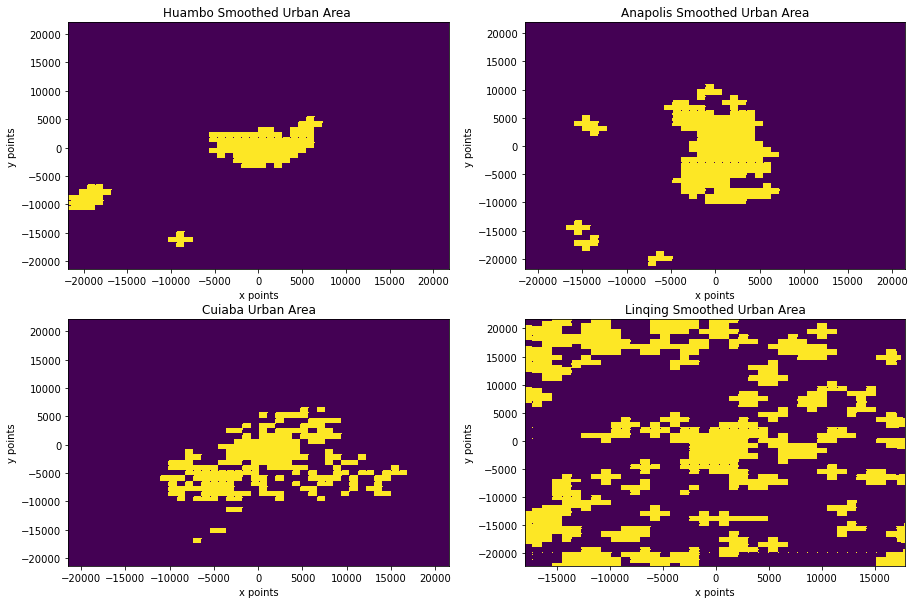

In [23]:
#Make plot
#Colour mesh plot
fig, axes = plt.subplots(nrows=2, ncols = 2, figsize = (15,10))


im = axes[0,0].pcolormesh(Huambo_X_lu, Huambo_Y_lu, Huambo_Z_lu)
#fig.colorbar(im, ax = axes[0,0])
axes[0,0].set_title('Huambo Smoothed Urban Area ')
axes[0,0].set_xlabel('x points')
axes[0,0].set_ylabel('y points')

axes[0,1].pcolormesh(Anapolis_X_lu, Anapolis_Y_lu, Anapolis_Z_lu)
axes[0,1].set_title('Anapolis Smoothed Urban Area')
axes[0,1].set_xlabel('x points')
axes[0,1].set_ylabel('y points')

axes[1,0].pcolormesh(Cuiaba_X_lu, Cuiaba_Y_lu, Cuiaba_Z_lu)
axes[1,0].set_title('Cuiaba Urban Area')
axes[1,0].set_xlabel('x points')
axes[1,0].set_ylabel('y points')

axes[1,1].pcolormesh(Linqing_X_lu, Linqing_Y_lu, Linqing_Z_lu)
axes[1,1].set_title('Linqing Smoothed Urban Area')
axes[1,1].set_xlabel('x points')
axes[1,1].set_ylabel('y points')


In [25]:
Linqing_LULC_sm_df['urban_smoothed_5'] = [1 if x >= 5 else 0 for x in Linqing_LULC_sm_df['urban_sum_smoothed_2015']]

Linqing_LULC_sm_df['urban_smoothed_6'] = [1 if x >= 6 else 0 for x in Linqing_LULC_sm_df['urban_sum_smoothed_2015']]

Linqing_LULC_sm_df['urban_smoothed_7'] = [1 if x >= 7 else 0 for x in Linqing_LULC_sm_df['urban_sum_smoothed_2015']]

In [27]:
####  OBSERVATION POINT   #####

#Look at different levels of smoothing 

#Linqing
#4 pixels urban = urban
x_lu = Linqing_LULC_sm_df['x_points'].values
y_lu = Linqing_LULC_sm_df['y_points'].values
U_lu = Linqing_LULC_sm_df['is_urban_smoothed_2015'].values

Linqing_X_lu, Linqing_Y_lu = np.meshgrid(x_lu,y_lu)
sm_4_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')

#5 pixels urban = urban
U_lu = Linqing_LULC_sm_df['urban_smoothed_5'].values
sm_5_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')

#6 pixels urban = urban
U_lu = Linqing_LULC_sm_df['urban_smoothed_6'].values
sm_6_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')

#7 pixels urban = urban
U_lu = Linqing_LULC_sm_df['urban_smoothed_7'].values
sm_7_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')

#no smoothing
U_lu = Linqing_LULC_df['is_urban_overall_2015'].values
sm_none_Z_lu = scipy.interpolate.griddata((x_lu, y_lu), U_lu, (Linqing_X_lu, Linqing_Y_lu), method='nearest')


Text(0, 0.5, 'y points')

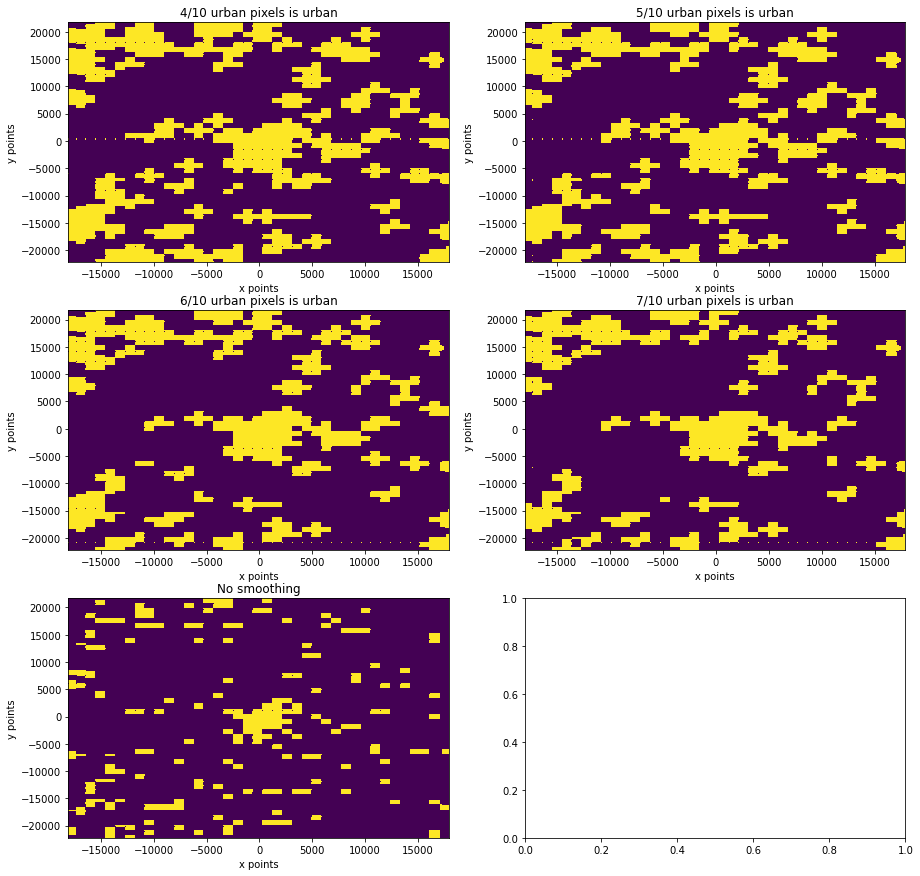

In [30]:
#Make plot
#Colour mesh plot
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (15,15))


im = axes[0,0].pcolormesh(Linqing_X_lu, Linqing_Y_lu, sm_4_Z_lu)
#fig.colorbar(im, ax = axes[0,0])
axes[0,0].set_title('4/10 urban pixels is urban')
axes[0,0].set_xlabel('x points')
axes[0,0].set_ylabel('y points')

axes[0,1].pcolormesh(Linqing_X_lu, Linqing_Y_lu, sm_5_Z_lu)
axes[0,1].set_title('5/10 urban pixels is urban')
axes[0,1].set_xlabel('x points')
axes[0,1].set_ylabel('y points')

axes[1,0].pcolormesh(Linqing_X_lu, Linqing_Y_lu, sm_6_Z_lu)
axes[1,0].set_title('6/10 urban pixels is urban')
axes[1,0].set_xlabel('x points')
axes[1,0].set_ylabel('y points')

axes[1,1].pcolormesh(Linqing_X_lu, Linqing_Y_lu, sm_7_Z_lu)
axes[1,1].set_title('7/10 urban pixels is urban')
axes[1,1].set_xlabel('x points')
axes[1,1].set_ylabel('y points')

axes[2,0].pcolormesh(Linqing_X_lu, Linqing_Y_lu, sm_none_Z_lu)
axes[2,0].set_title('No smoothing')
axes[2,0].set_xlabel('x points')
axes[2,0].set_ylabel('y points')